## Clustering 

- Clustering and classification are two different things
- Building a recommendation systems for customers

In [15]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\ashfa\Desktop\Invoice_Data.csv",encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [18]:
df.duplicated().sum()

np.int64(5268)

In [19]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
#dropping duplicated rows
df = df.drop_duplicates()

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
#Drop cancelled transaction 
# Drop rows where the 'InvoiceNo' starts with 'c'
df = df[~df['InvoiceNo'].str.startswith('C')]

In [25]:
#StockCode should contain 5 or 6 characters 
df['StockCode'].head()

0    85123A
1     71053
2    84406B
3    84029G
4    84029E
Name: StockCode, dtype: object

In [26]:
df["StockCode"].unique

<bound method Series.unique of 0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: StockCode, Length: 392732, dtype: object>

In [27]:
#stock code correction
ddfata = df[(df['StockCode'].str.len() > 4) & (df['StockCode'].str.len() <=6)]

In [28]:
# Check for StockCode with 4 or 7 characters
with_4_chars = any(df['StockCode'].str.len() == 4)
with_7_chars = any(df['StockCode'].str.len() == 7)

# Print results
print(f"StockCode with 4 characters exists: {with_4_chars}")
print(f"StockCode with 7 characters exists: {with_7_chars}")

StockCode with 4 characters exists: True
StockCode with 7 characters exists: True


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


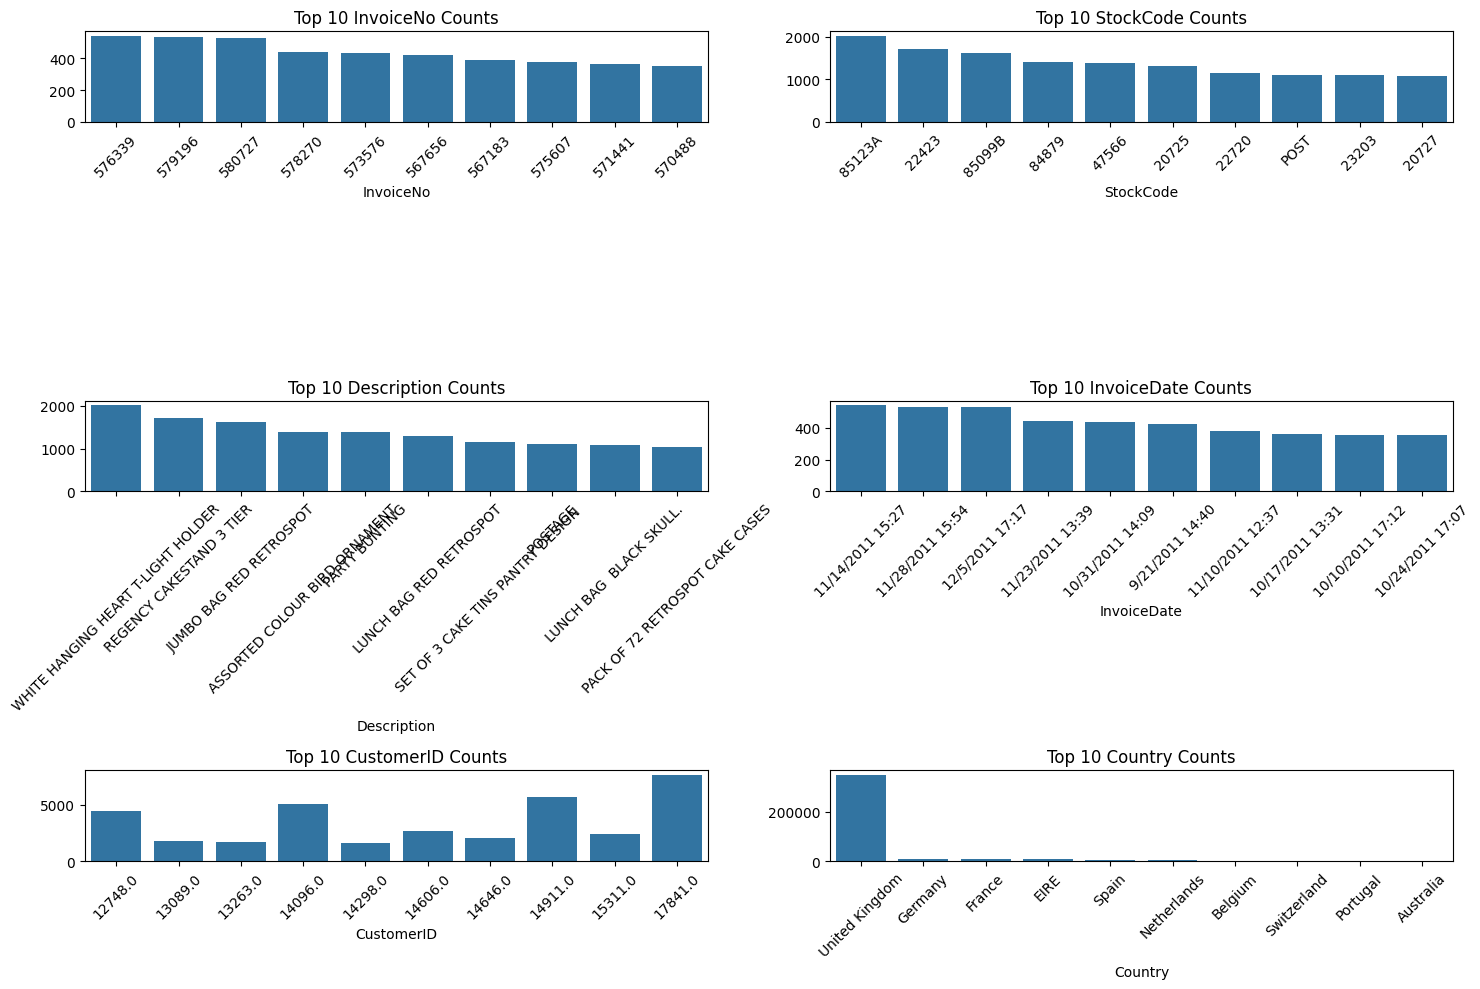

In [30]:
# Create bar plots for all categorical variables
plt.figure(figsize=(15, 10))
categorical_columns = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country']

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x=df[col].value_counts().index[:10], y=df[col].value_counts().values[:10])
    plt.xticks(rotation=45)
    plt.title(f'Top 10 {col} Counts')

plt.tight_layout()
plt.show()

In [31]:
# Unit price cleaning
df = df[df['UnitPrice'] > 0]
df.reset_index(drop=True, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [32]:
#Create a recoomendation system for customers from UK
df['Country'].unique

<bound method Series.unique of 0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
392687            France
392688            France
392689            France
392690            France
392691            France
Name: Country, Length: 392692, dtype: object>

In [33]:
# Assuming df is your DataFrame
df['Is_UK'] = (df['Country'] == 'United Kingdom').astype(int)

In [34]:
# Convert 'InvoiceDate' to datetime objects if it's not already done
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Get today's date
today = pd.to_datetime('today')

# Calculate the difference between today and the last purchase date
df['DaysSinceLastPurchase'] = (today - df['InvoiceDate']).dt.days

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Is_UK,DaysSinceLastPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,5222
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,5222
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,5222
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,5222
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,5222


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   InvoiceNo              392692 non-null  object        
 1   StockCode              392692 non-null  object        
 2   Description            392692 non-null  object        
 3   Quantity               392692 non-null  int64         
 4   InvoiceDate            392692 non-null  datetime64[ns]
 5   UnitPrice              392692 non-null  float64       
 6   CustomerID             392692 non-null  float64       
 7   Country                392692 non-null  object        
 8   Is_UK                  392692 non-null  int64         
 9   DaysSinceLastPurchase  392692 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 30.0+ MB


In [36]:
df_numerical = df.select_dtypes(include=['number'])

# Display the first five rows
print(df_numerical.head())

   Quantity  UnitPrice  CustomerID  Is_UK  DaysSinceLastPurchase
0         6       2.55     17850.0      1                   5222
1         6       3.39     17850.0      1                   5222
2         8       2.75     17850.0      1                   5222
3         6       3.39     17850.0      1                   5222
4         6       3.39     17850.0      1                   5222


In [37]:
# Normlaize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [38]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)

PCA()

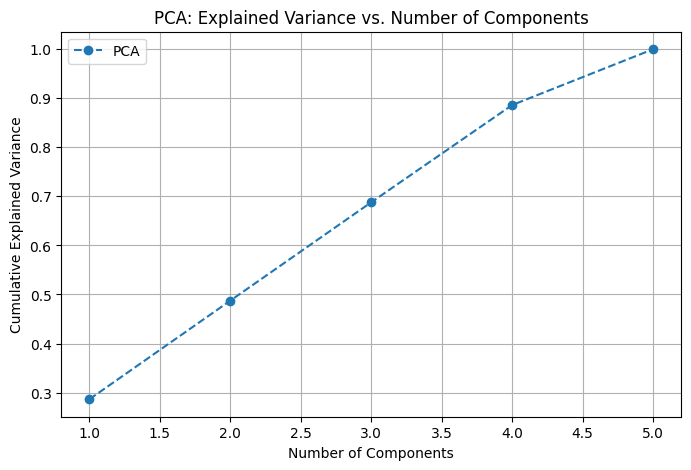

In [39]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot PCA explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='PCA')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Apply PCA with 4 components
pca = PCA(n_components=4)
pca_final = pca.fit_transform(df_scaled)
print(pca_final)

[[ 1.27962389  0.92038273  1.48831935 -0.97320556]
 [ 1.27775992  0.94872281  1.48829632 -0.94831793]
 [ 1.27879929  0.92172561  1.49578591 -0.96115071]
 ...
 [-3.05690269 -0.61228346 -1.1096918   0.55788506]
 [-3.05690269 -0.61228346 -1.1096918   0.55788506]
 [-3.05848751 -0.58259052 -1.11344975  0.57852296]]


In [41]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.features import PCA as YellowbrickPCA  # Correct import for PCA visualizer

In [43]:
#elbow method --> finding the optimum number of clusters
# after that fit to any clustering models (k-means,DBSCAN,k-modes(improved version of kmeans--> can cluster categorical data as well))
# After clustering there should be a cluster label column where each row will have a label value
# Add this column to the original dataset 
# Evaluation using sillhoute score(-1 to +1), +1 --> good clustering
# Davis-Boulding score ---> cluster evaluation ---> lower values are better, compare the values between clusters
# Then can do a cluster aalysis (cluster profiling --> within cluster analysis --> should explain about each cluster)
# Then build a recommendation system with different recomendation methods
# when the id is inserted then should recommend a product

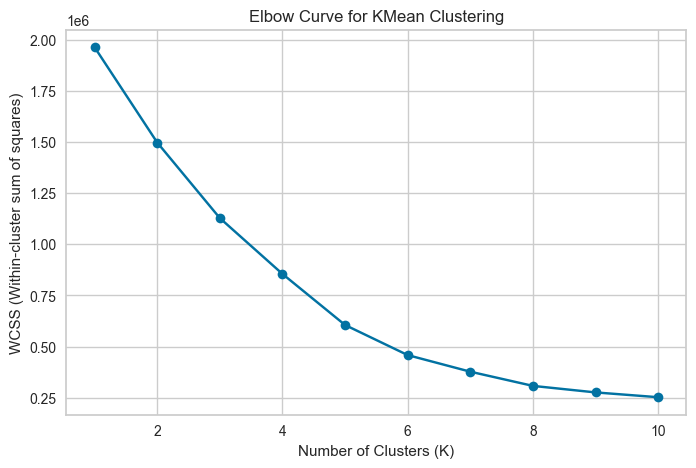

In [44]:
from sklearn.cluster import KMeans, DBSCAN

# Elbow method for KMean clustering method
wcss=[]
K=range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title("Elbow Curve for KMean Clustering")
plt.show()

In [45]:
#Apply clustering algorithms

# K-Means Clustering
optimal_k = 4  # Set based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit_predict(pca_final)
df_cluster_labels=kmeans.labels_
df_cluster_labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [46]:
# Ensure the dataset and PCA results have the same number of rows
df = df.iloc[:len(pca_final)].copy()

df['Label']=df_cluster_labels

print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Is_UK  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom      1   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      1   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom      1   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      1   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom      1   

   DaysSinceLastPurchase  Label  
0                   5222      1  
1                   5222      1  
2                   5222      1  
3   

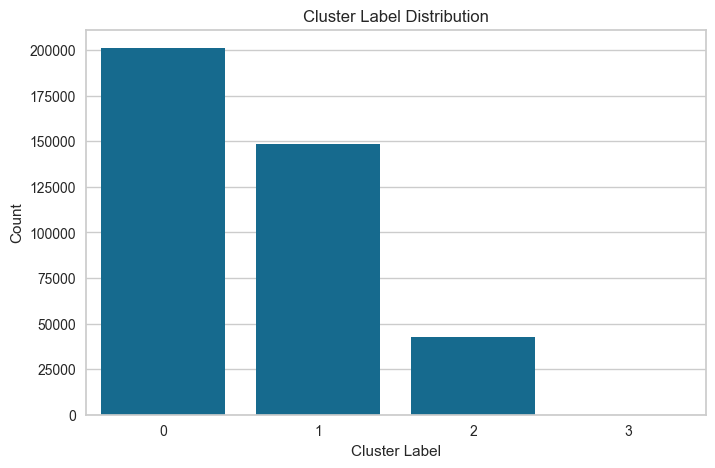

In [47]:
# Create bar graph for Label counts
plt.figure(figsize=(8, 5))
sns.countplot(x=df_cluster_labels)
plt.title('Cluster Label Distribution')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# Save the updated dataset with cluster labels
df.to_csv("Labeled_Invoice_Data_1.csv", index=False)

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(pca_final,df_cluster_labels)
print(f"Davies-Bouldin Score: {db_score:.4f}")

Davies-Bouldin Score: 0.5945


In [ ]:
# Check for the outliers
df['Label'].value_counts()

Label
3    200982
0    148824
1     42884
2         2
Name: count, dtype: int64

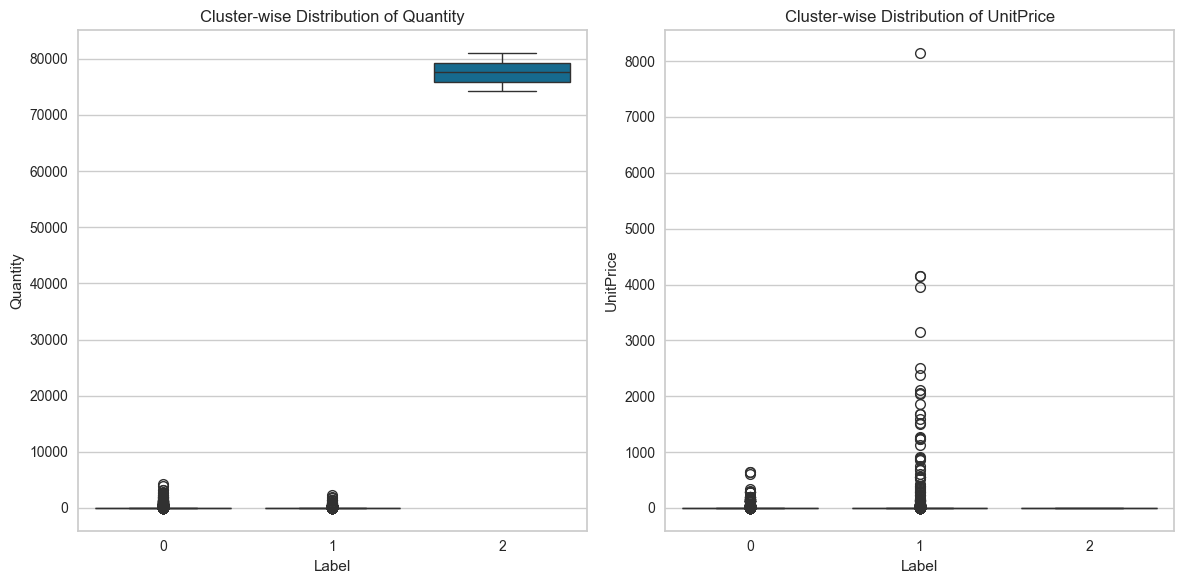

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key features to compare across clusters
key_features = ["Quantity", "UnitPrice"] 

fig, axes = plt.subplots(nrows=1, ncols=len(key_features), figsize=(12, 6))

# Loop through features and create boxplots
for ax, feature in zip(axes, key_features):
    sns.boxplot(x=df["Label"], y=df[feature], ax=ax)
    ax.set_title(f"Cluster-wise Distribution of {feature}")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

def recommend_products_by_cluster(customer_id, df, top_n=5):
    """
    Recommend top purchased products for a customer based on their cluster.

    :param customer_id: The ID of the customer to generate recommendations for.
    :param df: DataFrame containing customer purchase history and cluster labels.
    :param top_n: Number of top products to recommend.
    :return: DataFrame with recommended products and their total quantities.
    """
    try:
        # Ensure 'CustomerID' exists in the dataset
        if customer_id not in df["CustomerID"].values:
            return "Customer ID not found."

        # Get the cluster label of the customer
        customer_cluster = df.loc[df["CustomerID"] == customer_id, "Label"].iloc[0]

        # Filter customers belonging to the same cluster
        cluster_customers = df[df["Label"] == customer_cluster]

        # Aggregate top purchased products
        top_products = (
            cluster_customers.groupby("Description")["Quantity"]
            .sum()
            .nlargest(top_n)  # Fetch top N products
        )

        # Return as DataFrame for better readability
        return pd.DataFrame({"Product": top_products.index, "Total Quantity": top_products.values})

    except Exception as e:
        return f"An error occurred: {e}"

# Example Usage
customer_id = 12753  # Replace with an actual ID
recommendations = recommend_products_by_cluster(customer_id, df, top_n=5)
print(recommendations)

                           Product  Total Quantity
0               RABBIT NIGHT LIGHT           15437
1  PACK OF 72 RETROSPOT CAKE CASES           10268
2          MINI PAINT SET VINTAGE             9613
3              SPACEBOY LUNCH BOX             8361
4             DOLLY GIRL LUNCH BOX            7330
